# CSCI 303
# Introduction to Data Science
<p/>
### 10 - Exploratory Data Analysis

![Exploratory data analysis](eda.png)

## This Lecture
---
- Explore the Boston Housing data set

The obligatory setup code...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

from pandas import Series, DataFrame

plt.style.use('seaborn-whitegrid')

%matplotlib inline

## The Boston Housing Dataset
---
A well known and heavily studied dataset for statistical inference.

Available in the scikit-learn package, or many sources online.

In [2]:
raw = sk.datasets.load_boston()
boston = DataFrame(raw.data, columns=raw.feature_names)
boston['MEDV'] = raw.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Basic Statistics
---
pandas provides the `describe` function (similar to R's `summary`):

In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## What Shall We Explore?
---
Some ideas:

- distributions of individual inputs
- correlations between pairs of inputs and/or the target
- your suggestion here

## Distributions
---
Often best explored via histogram.

A histogram divides data into (usually) even sized *bins*, then counts the frequency of occurrence of samples in each bin.

For example, let's look at average number of rooms per dwelling.

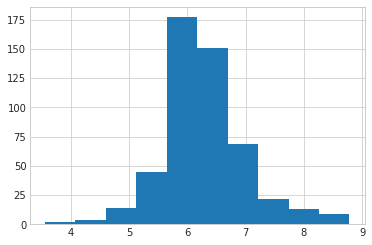

In [4]:
plt.hist(boston['RM'])
plt.show()

Very normal looking, isn't it?  We can vary the number of bins for more or less precision.

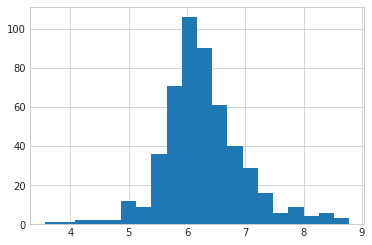

In [5]:
plt.hist(boston['RM'], bins=20)
plt.show()

How about crime?

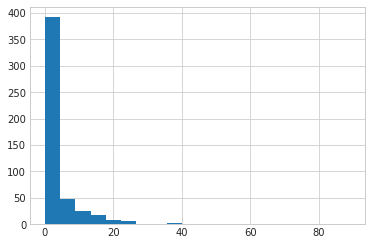

In [6]:
plt.hist(boston['CRIM'], bins=20)
plt.show()

## Correlations
---
Often best explored via a scatter plot.

I theorize that there will be a correlation between percentage of industrial zoning and nitric oxide concentrations.  Let's take a look:

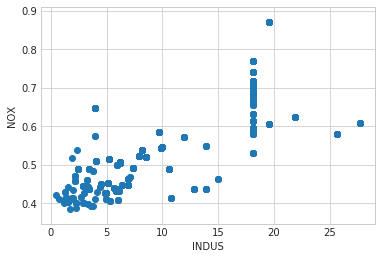

In [7]:
plt.scatter(boston['INDUS'], boston['NOX'])
plt.xlabel('INDUS'); plt.ylabel('NOX');
plt.show()

There seems to be an odd artifact at around 18% on the INDUS axis.

Let's take a closer look at the INDUS data.

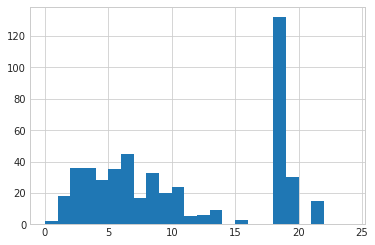

In [8]:
plt.hist(boston['INDUS'], bins=range(25))
plt.show()

In [9]:
boston['INDUS'].value_counts().head()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
Name: INDUS, dtype: int64

This spike at 18.10 seems suspicious.  Some kind of default?

In [10]:
b2 = boston[boston['INDUS'] == 18.10]
b2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,132.000000,132.0,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.0,132.0,1.320000e+02,132.000000,132.000000,132.000000
mean,12.683533,0.0,1.810000e+01,0.060606,0.672417,6.022152,89.805303,2.061254,24.0,666.0,2.020000e+01,288.089167,18.600606,16.403788
std,13.082369,0.0,4.636122e-14,0.239515,0.061004,0.718449,12.625809,0.617901,0.0,0.0,1.426499e-14,145.860431,6.905296,8.539745
min,0.671800,0.0,1.810000e+01,0.000000,0.532000,3.561000,40.300000,1.129600,24.0,666.0,2.020000e+01,0.320000,2.960000,5.000000
25%,5.669078,0.0,1.810000e+01,0.000000,0.614000,5.713000,85.925000,1.589250,24.0,666.0,2.020000e+01,167.375000,14.175000,11.225000
50%,8.887540,0.0,1.810000e+01,0.000000,0.693000,6.176000,94.400000,1.943400,24.0,666.0,2.020000e+01,373.740000,17.910000,14.400000
75%,14.333700,0.0,1.810000e+01,0.000000,0.713000,6.419000,98.825000,2.431300,24.0,666.0,2.020000e+01,395.292500,23.045000,19.900000
max,88.976200,0.0,1.810000e+01,1.000000,0.770000,8.780000,100.000000,4.098300,24.0,666.0,2.020000e+01,396.900000,37.970000,50.000000


Four of the other columns have stddev = 0 when filtered on this value.

In [11]:
b2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
361,3.83684,0.0,18.1,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
362,3.67822,0.0,18.1,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8
363,4.22239,0.0,18.1,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64,16.8
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5


What are the chances that 132 sequential entries have the same data for ZN, INDUS, RAD, TAX, and PTRATIO?

Let's set this aside for a moment and explore some other correlations.

We can drive plots directly from pandas, too, which provides some extra benefits - like axes labeling.

Let's look at # of rooms versus median value:

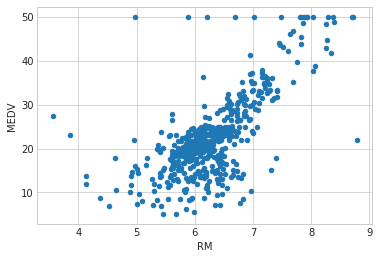

In [12]:
boston.plot(kind='scatter', x='RM', y='MEDV')
plt.show()

Not too surprising, there seems to be a strong correlation between number of rooms and median value.

Now, though, we seem to have some other "suspicious" data - look at all those houses at the top!

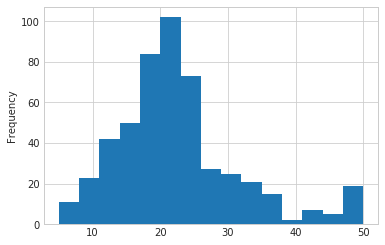

In [13]:
boston['MEDV'].plot(kind='hist', bins=15)

In [14]:
boston['MEDV'].value_counts().iloc[:10]

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
Name: MEDV, dtype: int64

In [15]:
b3 = boston[boston['MEDV']==50]
b3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


I'm quite suspicious that this value is some kind of data-entry default.

1. It's a round number
2. It's the maximum
3. It explains at least some big outliers: tracts where the average rooms per house < 5 AND the median value is 50,000 (and not with any obvious other great things going on)

For now, let's remove that data. It might not be justified, but without access to the original data collection info, it makes the most sense to me.

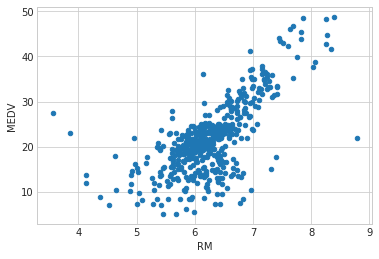

In [16]:
bfix1 = boston[boston['MEDV'] != 50.0]
bfix1.plot(kind='scatter', x='RM', y='MEDV')

I'm curious about some of these other outliers.  I'm going to add in some other variables using color cues, just to see if they highlight the outliers.

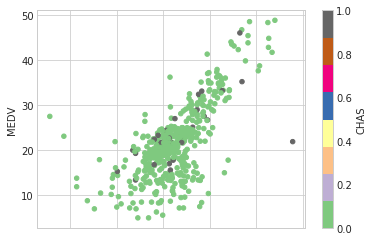

In [17]:
bfix1.plot(kind='scatter', x='RM', y='MEDV', c='CHAS', colormap='Accent')

That wasn't helpful.  What about our industrial zoning variable?

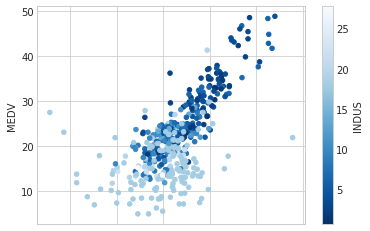

In [18]:
bfix1.plot(kind='scatter', x='RM', y='MEDV', c='INDUS', colormap='Blues_r')

Hm.  I have a theory... not much of one, though.

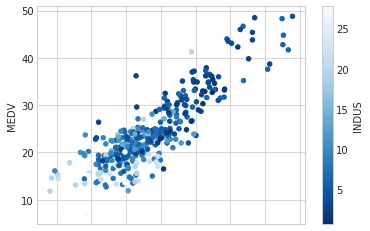

In [19]:
bfix2 = bfix1[bfix1['INDUS'] != 18.10]
bfix2.plot(kind='scatter', x='RM', y='MEDV', c='INDUS', colormap='Blues_r')

So this plot now actually makes sense; all the outliers vanished when we removed some suspicious data.

OTOH, we almost certainly lost some good data.

Was removing data the right thing to do?

In [20]:
bfix2.shape, boston.shape

((363, 14), (506, 14))

Other questions we could explore:
    
- what is the deal with houses on the Charles River?
- how do each of the remaining variables correlate with median value?
- how do DIS, RAD, and INDUS relate to each other?
- is there a relationship between crime and the age of the neighborhood?
- is PTRATIO relevant to anything?

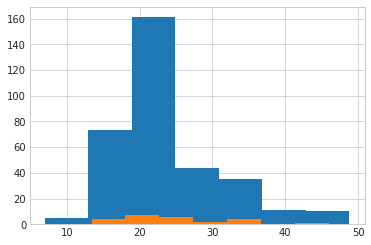

In [21]:
plt.hist(bfix2[bfix2['CHAS']==0]['MEDV'], bins=7)
plt.hist(bfix2[bfix2['CHAS']==1]['MEDV'], bins=7)
plt.show()

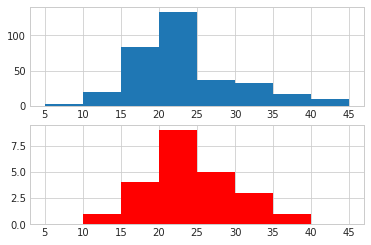

In [22]:
plt.subplot(2,1,1)
plt.hist(bfix2[bfix2['CHAS']==0]['MEDV'], bins=range(5,50,5))
plt.subplot(2,1,2)
plt.hist(bfix2[bfix2['CHAS']==1]['MEDV'], bins=range(5,50,5), color='red')
plt.show()

In [23]:
bfix2['CHAS'].value_counts()

0.0    339
1.0     24
Name: CHAS, dtype: int64

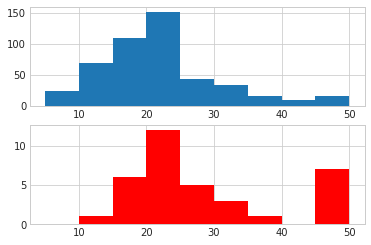

In [24]:
plt.subplot(2,1,1)
plt.hist(boston[boston['CHAS']==0]['MEDV'], bins=range(5,55,5))
plt.subplot(2,1,2)
plt.hist(boston[boston['CHAS']==1]['MEDV'], bins=range(5,55,5), color='red')
plt.show()

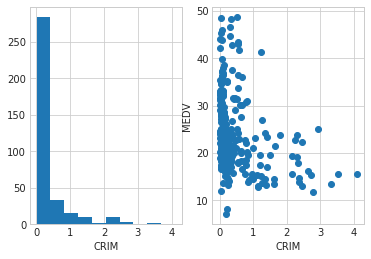

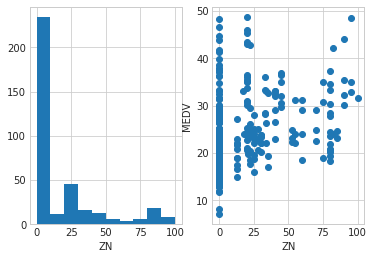

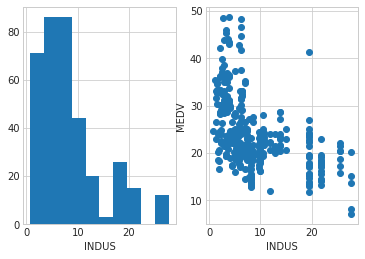

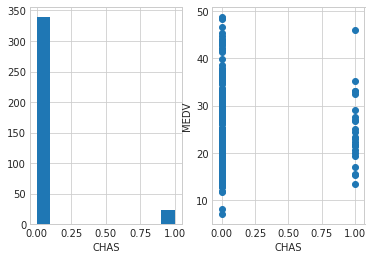

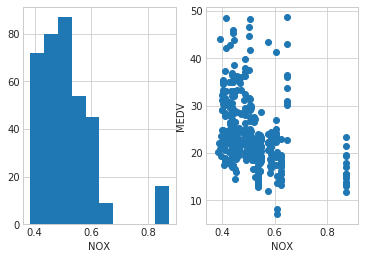

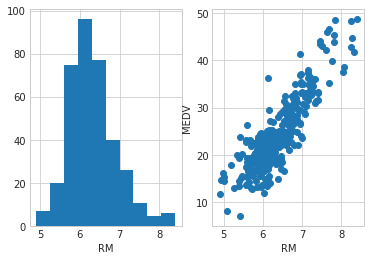

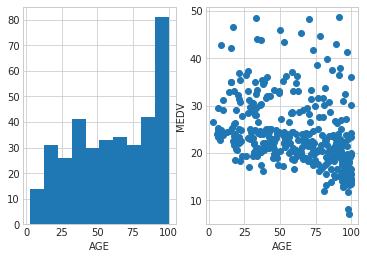

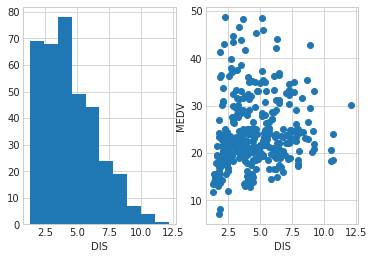

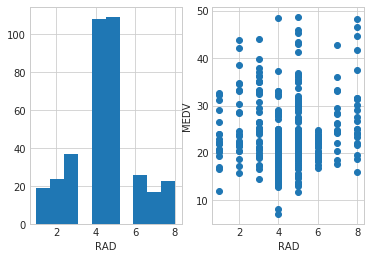

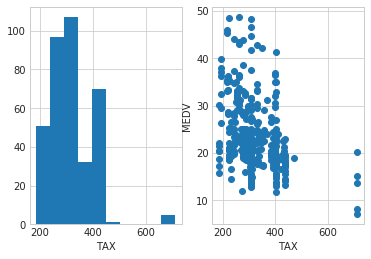

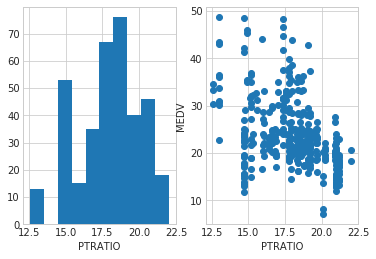

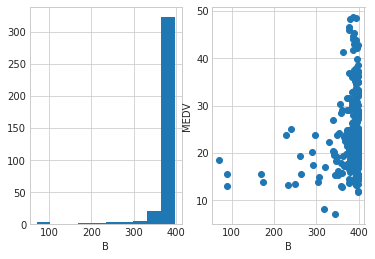

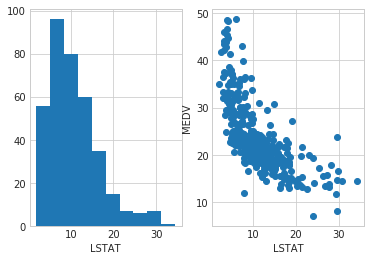

In [25]:
for f in raw.feature_names:
    plt.subplot(1,2,1)
    plt.hist(bfix2[f])
    plt.xlabel(f)
    plt.subplot(1,2,2)
    plt.scatter(bfix2[f], bfix2['MEDV'])
    plt.xlabel(f)
    plt.ylabel('MEDV')
    plt.show()
    

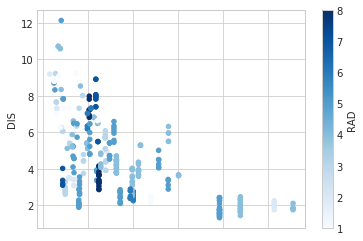

In [26]:
bfix2.plot(kind='scatter', x='INDUS', y='DIS', c='RAD', colormap='Blues')

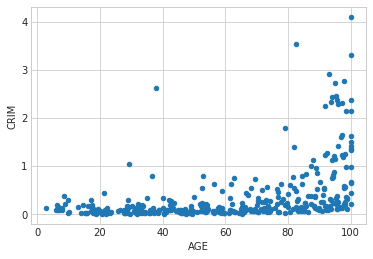

In [27]:
bfix2.plot(kind='scatter', x='AGE', y='CRIM')